# Countries of the World

## 1. Introduction

In this investigation of the "Countries of the World" dataset I will analyse GDP ($ per capita), Literacy (%) and Phones (per 1000) to test the hypothesis that there would be a significant positive relationship between these variables.

## 2. Import and clean the data

### 2.1 Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')


### 2.2 Read csv into data frame

In [2]:
countries = pd.read_csv("countries of the world.csv", sep=",")

In [3]:
countries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


### 2.3 Return concise summary of the data frame

In [4]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

### 2.4 Rename columns

In [5]:
countries.rename(columns={"Area (sq. mi.)": "Area", "Pop. Density (per sq. mi.)":"Pop_Density",
                        "Coastline (coast/area ratio)":"Coastline","Net migration":"Net_migration",
                        "Infant mortality (per 1000 births)":"Infant_mortality","GDP ($ per capita)":"GDP",
                        "Literacy (%)":"Literacy","Phones (per 1000)":"Phones","Arable (%)":"Arable",
                        "Crops (%)":"Crops","Other (%)":"Other"},inplace = True)

countries.columns

Index(['Country', 'Region', 'Population', 'Area', 'Pop_Density', 'Coastline',
       'Net_migration', 'Infant_mortality', 'GDP', 'Literacy', 'Phones',
       'Arable', 'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

### 2.5 Change data type to float

In [6]:
for column in countries.columns[4:]:
    if 'GDP' not in column: 
        countries[column] = countries[column].str.replace(',','.').astype(float)

In [7]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country             227 non-null object
Region              227 non-null object
Population          227 non-null int64
Area                227 non-null int64
Pop_Density         227 non-null float64
Coastline           227 non-null float64
Net_migration       224 non-null float64
Infant_mortality    224 non-null float64
GDP                 226 non-null float64
Literacy            209 non-null float64
Phones              223 non-null float64
Arable              225 non-null float64
Crops               225 non-null float64
Other               225 non-null float64
Climate             205 non-null float64
Birthrate           224 non-null float64
Deathrate           223 non-null float64
Agriculture         212 non-null float64
Industry            211 non-null float64
Service             212 non-null float64
dtypes: float64(16), int64(2), object(2)
memory usage: 35.6+ KB


### 2.6 NaNs and empty fields

### 2.6.1 Number of NaN values for each column

In [8]:
missing_values = countries.isnull().sum()
missing_values

Country              0
Region               0
Population           0
Area                 0
Pop_Density          0
Coastline            0
Net_migration        3
Infant_mortality     3
GDP                  1
Literacy            18
Phones               4
Arable               2
Crops                2
Other                2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
dtype: int64

### 2.6.2 Number of zero values for each column

In [9]:
zero_values = countries[countries==0].count()
zero_values

Country              0
Region               0
Population           0
Area                 0
Pop_Density          1
Coastline           44
Net_migration       62
Infant_mortality     0
GDP                  0
Literacy             0
Phones               0
Arable               9
Crops               28
Other                0
Climate              0
Birthrate            0
Deathrate            0
Agriculture          1
Industry             0
Service              0
dtype: int64

### 2.6.3 Replace all NaN with zeros

In [10]:
countries.fillna(0)

,Country,Region,Population,Area,Pop_Density,Coastline,Net_migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,0.0,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,0.00,0.00,0.0,0.0,0.0,0.02,0.00,99.98,1.0,0.00,0.00,0.000,0.000,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


__Other possible solutions could have been substituting missing data with mean or median for the country's region.__ 

__Region mean for GDP, Literacy and Phones:__

In [11]:
countries.groupby('Region')[['GDP', 'Literacy', 'Phones']].mean()

,GDP,Literacy,Phones
Region,,,
ASIA (EX. NEAR EAST),8053.571429,79.553571,171.159259
BALTICS,11300.000000,99.733333,292.866667
C.W. OF IND. STATES,4000.000000,98.725000,163.850000
EASTERN EUROPE,9808.333333,97.088889,280.750000
LATIN AMER. & CARIB,8682.222222,90.654545,271.661364
NEAR EAST,10456.250000,79.521429,209.113333
NORTHERN AFRICA,5460.000000,67.240000,100.200000
NORTHERN AMERICA,26100.000000,97.750000,686.740000
OCEANIA,8247.619048,88.835294,189.885714


__Region median for GDP, Literacy and Phones:__

In [12]:
countries.groupby('Region')[['GDP', 'Literacy', 'Phones']].median()

,GDP,Literacy,Phones
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,61.50
BALTICS,11400.0,99.80,321.40
C.W. OF IND. STATES,3450.0,99.05,155.35
EASTERN EUROPE,9100.0,98.60,296.05
LATIN AMER. & CARIB,6300.0,94.05,222.85
NEAR EAST,9250.0,83.00,211.00
NORTHERN AFRICA,6000.0,70.00,123.60
NORTHERN AMERICA,29800.0,97.50,683.20
OCEANIA,5000.0,95.00,118.60


### 2.7 List of unique regions

In [13]:
countries.Region.unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

### 2.7.1 Remove spaces in Region column

In [14]:
countries.Region = countries.Region.str.strip()
countries.Region.unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

## 3. Exploratory Data Analysis (EDA)

### 3.1 Bar chart showing Number of Countries by Region

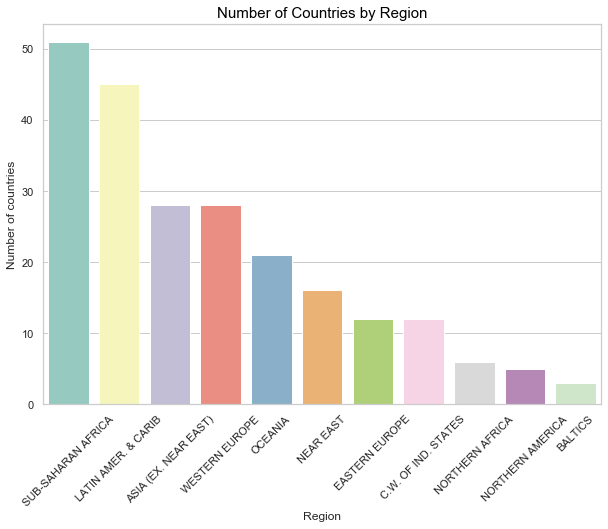

In [15]:
sns.set(style="whitegrid")

Region = countries.Region.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=Region.index,y=Region.values, palette="Set3")
plt.xticks(rotation=45)
plt.ylabel('Number of countries')
plt.xlabel('Region')
plt.title('Number of Countries by Region', color = 'black', fontsize = 15)
plt.show()

### 3.2 Correlation heatmap of numerical data

The heatmap clearly shows the strength of correlation between pairs of variables.

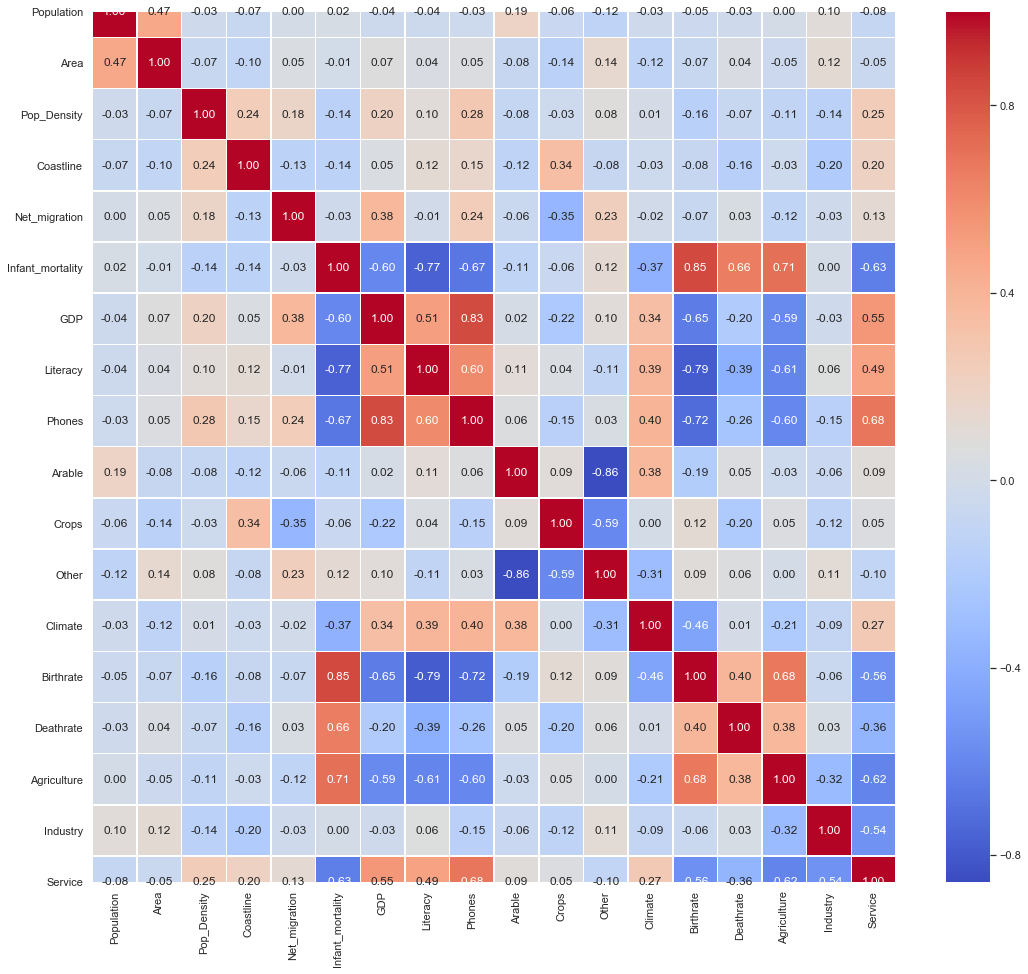

In [16]:
plt.figure(figsize=(18, 16))
sns.heatmap(data=countries.iloc[:,2:].corr(), annot=True, linewidth=0.5, fmt='.2f', cmap='coolwarm')

plt.show()

There appears to be a very strong positive linear relationship between GDP and Phones (0.83), a moderate to strong positive relationship between Literacy and Phones (0.60) and a moderate positive relationship between GDP and Literacy (0.51).

### 3.3 Boxplots 

Boxplots are useful for analysing the relationship between a categorical feature (Region) and a continuous feature (GDP, Literacy and Phones) and give a good indication of how the values in the data are spread out. They are a standardised way of displaying the distribution of data based on a five number summary (“minimum”, first quartile, median, third quartile, and “maximum”).

In [17]:
countries[["GDP", "Literacy", "Phones"]].describe()

,GDP,Literacy,Phones
count,226.000000,209.000000,223.000000
mean,9689.823009,82.838278,236.061435
std,10049.138513,19.722173,227.991829
min,500.000000,17.600000,0.200000
25%,1900.000000,70.600000,37.800000
50%,5550.000000,92.500000,176.200000
75%,15700.000000,98.000000,389.650000
max,55100.000000,100.000000,1035.600000


### 3.3.1 Boxplots for GDP per capita , Literacy (%) and Phones by Region

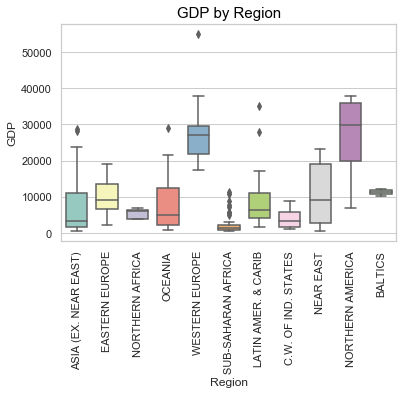

In [18]:
sns.boxplot(x="Region",y="GDP",data=countries,width=0.7,palette="Set3",fliersize=5)
plt.xticks(rotation=90)
plt.title("GDP by Region",color="black", fontsize = 15)
plt.show()

This plot shows that North America has the highest GDP, variability similar to the Near East, but Western Europe has the largest outlier. Sub-Saharan Africa has the lowest GDP and least variability.

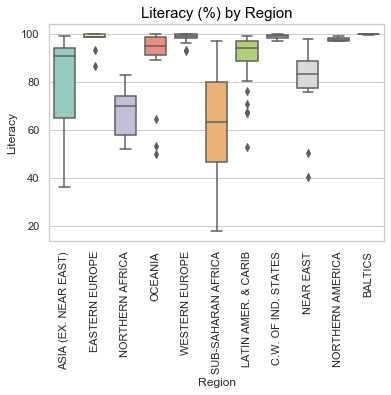

In [19]:
sns.boxplot(x="Region",y="Literacy",data=countries,width=0.7,palette="Set3",fliersize=5)
plt.xticks(rotation=90)
plt.title("Literacy (%) by Region",color="black", fontsize = 15)
plt.show()

This plot shows that Sub-Saharan Africa has the lowest literacy rates and greatest variability.

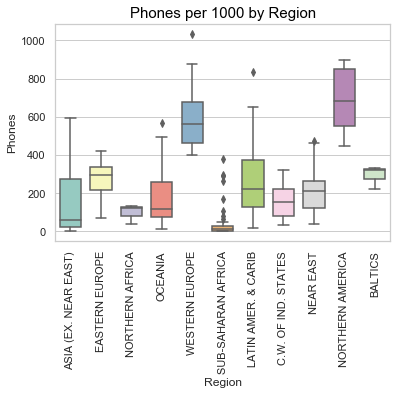

In [20]:
sns.boxplot(x="Region",y="Phones",data=countries,width=0.7,palette="Set3",fliersize=5)
plt.xticks(rotation=90)
plt.title("Phones per 1000 by Region",color="black", fontsize = 15)
plt.show()

This plot clearly shows highest rates of phone ownership in North America but also the greatest variability, and Western Europe has the largest outlier. The lowest rates of ownership and least variability are in Sub-Saharan Africa.

### 3.4 Categorical plots for GDP, Literacy and Phones by Region

Another way to show the relationship between a numerical and one or more categorical variables.

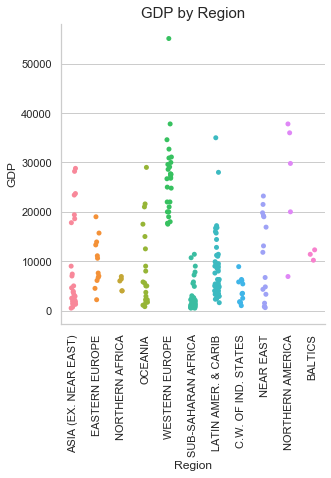

In [21]:
sns.set(style="whitegrid")
sns.catplot(x="Region", y="GDP", data=countries)
plt.title("GDP by Region", fontsize=15)
plt.xticks(rotation=90)
plt.show()

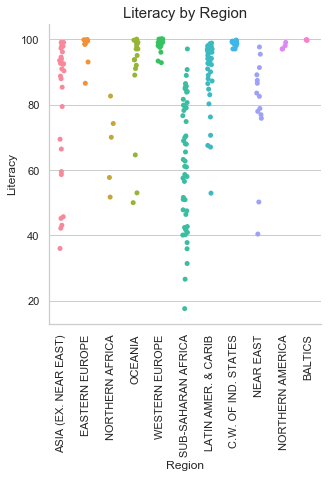

In [22]:
sns.set(style="whitegrid")
sns.catplot(x="Region", y="Literacy", data=countries)
plt.title("Literacy by Region", fontsize=15)
plt.xticks(rotation=90)
plt.show()

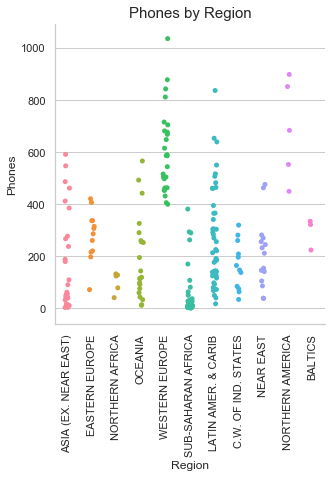

In [23]:
sns.set(style="whitegrid")
sns.catplot(x="Region", y="Phones", data=countries)
plt.title("Phones by Region", fontsize=15)
plt.xticks(rotation=90)
plt.show()

### 3.5 Scatterplots 

The data points on the scatterplot for GDP and Phones per 1000 clearly show a very strong positive correlation compared with those for GDP and Literacy (%) and Phones per 1000 and Literacy (%).

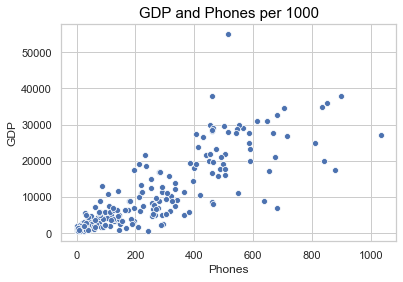

In [24]:
sns.scatterplot(x="Phones", y="GDP", data=countries)
plt.title("GDP and Phones per 1000",color="black", fontsize = 15)
plt.show()

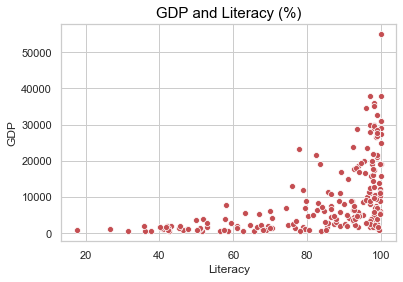

In [25]:
sns.scatterplot(x="Literacy", y="GDP", color="r", data=countries)
plt.title("GDP and Literacy (%)",color="black", fontsize = 15)
plt.show()

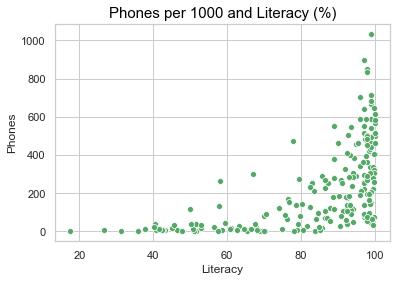

In [26]:
sns.scatterplot(x="Literacy", y="Phones", color="g", data=countries)
plt.title("Phones per 1000 and Literacy (%)",color="black", fontsize = 15)
plt.show()

### 3.6 Linear regression model

The linear relationship between GDP and Phones can be seen even more clearly by drawing a scatterplot of the two variables, fitting a regression model and plotting the resulting regression line.

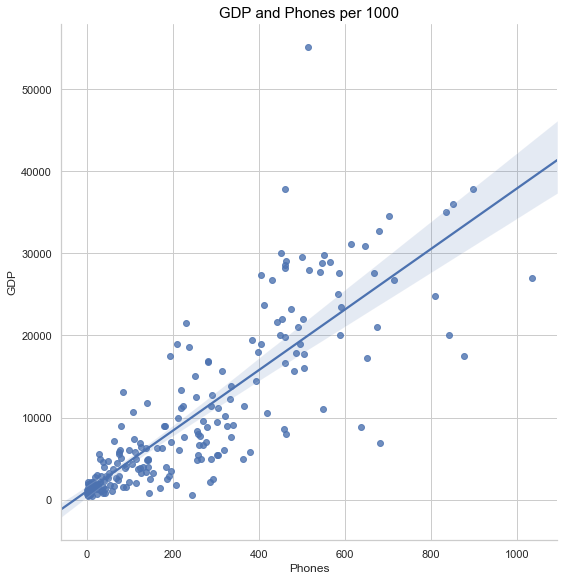

In [27]:
sns.set(style="whitegrid")
sns.lmplot(x="Phones",y="GDP", data=countries, height=8)
plt.title("GDP and Phones per 1000",color="black", fontsize = 15)
plt.show()

### 3.7 Horizontal bar chart showing GDP by Region

                  Region           GDP
9     SUB-SAHARAN AFRICA   2323.529412
2    C.W. OF IND. STATES   4000.000000
6        NORTHERN AFRICA   5460.000000
0   ASIA (EX. NEAR EAST)   8053.571429
8                OCEANIA   8247.619048
4    LATIN AMER. & CARIB   8682.222222
3         EASTERN EUROPE   9808.333333
5              NEAR EAST  10456.250000
1                BALTICS  11300.000000
7       NORTHERN AMERICA  26100.000000
10        WESTERN EUROPE  27046.428571


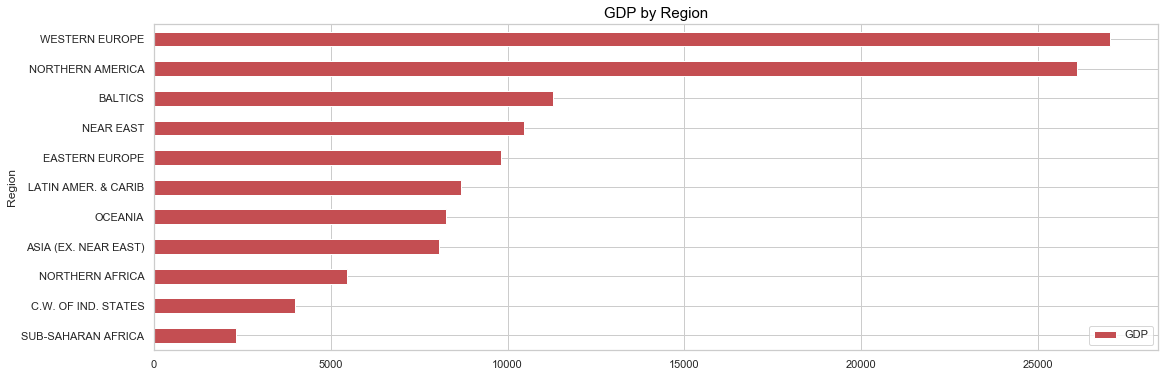

In [28]:
gdp_region = countries.groupby(by = ["Region"]).GDP.mean().reset_index().sort_values("GDP")
print(gdp_region)


gdp_region.plot(kind = 'barh', y="GDP", x="Region", figsize = (18,6), color="r")
plt.title("GDP by Region",color="black", fontsize = 15)
plt.show()

### 3.8 Frequency histogram for GDP

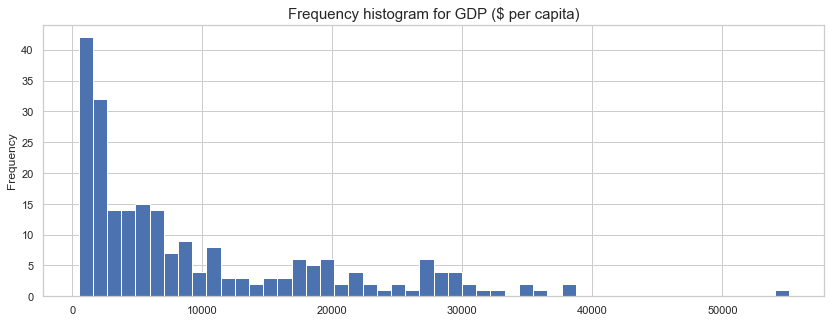

In [29]:
countries.GDP.plot(kind = 'hist',bins = 50,figsize = (14,5))
plt.title("Frequency histogram for GDP ($ per capita)", fontsize=15)
plt.show()

This histogram shows that most countries have a GDP of less than $10000 per capita.

### 3.8.1 Kernel density estimation

This is a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis.

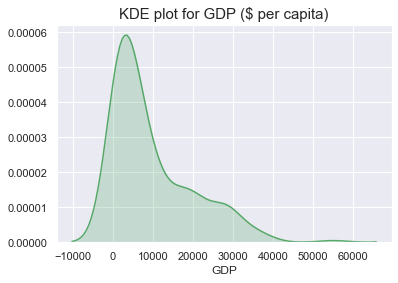

In [30]:
sns.set(style="darkgrid")
sns.distplot(countries.GDP,hist=False,color="g",kde_kws={"shade":True})
plt.title("KDE plot for GDP ($ per capita)", fontsize=15)
plt.show()

### 3.9 Comparing the top and bottom five countries by GDP  and Literacy

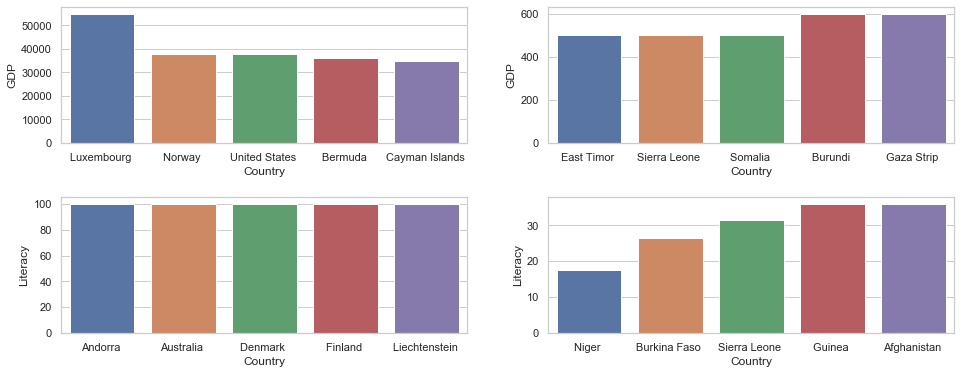

In [31]:
sns.set(style="whitegrid")
f, ax = plt.subplots(2, 2, figsize = (16,6))
plt.subplots_adjust(hspace=0.4)
k1 = sns.barplot(data = countries.nlargest(5, 'GDP'), x = 'Country', y = 'GDP', ax = ax[0,0])
k2 = sns.barplot(data = countries.nsmallest(5, 'GDP'), x = 'Country', y = 'GDP', ax = ax[0,1])
k3 = sns.barplot(data = countries.nlargest(5, 'Literacy'), x = 'Country', y = 'Literacy', ax = ax[1,0])
k4 = sns.barplot(data = countries.nsmallest(5, 'Literacy'), x = 'Country', y = 'Literacy', ax = ax[1,1])
plt.show()

It is interesting to observe that:

 - None of the top five countries by GDP appear in the top five countries by Literacy. 
 - Only one of the bottom five countries by GDP appears in the bottom five countries by Literacy (Sierra Leone). 
 

## 4. Conclusion

In summary the analysis shows that the strongest positive correlation between the three variables chosen (GDP per capita, Literacy (%) and Phones per 1000) is between GDP and Phones (0.83). One possible explanation is the importance of mobile telephony on economic growth in both developed and developing markets. 

It is somewhat surprising that this correlation was significantly stronger than the moderate relationship between GDP and Literacy (0.51), although other factors may have been influential such as wealthier countries contributing to wealth of neighbouring countries, the political state of a country, and the unemployment rate. 

The moderate to strong relationship between Literacy and Phones (0.60) would require further analysis but mobile technology is increasingly used to help spread reading and literacy where books are scarce but people have access to a working mobile phone.